<a href="https://colab.research.google.com/github/priyesh0071/FireBase-Authentication/blob/master/Copy_of_Data_Science_Lab_Exec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Enter your Details Here:

In [ ]:
Num, Name = input("Reg. Number:"), input("Name:")

Reg. Number:23MCA1103
Name:priyesh sinha


## Download kaggle data in Google Colab

Please follow the steps below to download and use kaggle data within Google Colab:

1. Go to your account, Scroll to API section and Click Expire API Token to remove previous tokens

2. Click on Create New API Token - It will download kaggle.json file on your machine.

3. Go to your Google Colab and run the following commands:


*  !pip install -q kaggle
*  from google.colab import files
*  files.upload()
>Choose the kaggle.json file that you downloaded




In [6]:
!pip install -q kaggle


In [8]:
from google.colab import files

In [9]:
files.upload()

Saving train.csv to train.csv


{'train.csv': b'Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice\n1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkF

In [13]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"priyeshsinha1103","key":"e004e09586b9298ea855e6ab92073ab2"}'}

In [14]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [15]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 75.6MB/s]


### Make directory named kaggle and copy kaggle.json file there.
*   ! mkdir ~/.kaggle
*   ! cp kaggle.json ~/.kaggle/
### Change the permissions of the file.
* ! chmod 600 ~/.kaggle/kaggle.json
### To list out the datasets in Kaggle
* ! kaggle datasets list

### Download Data
* ! kaggle competitions download -c 'name-of-competition'

##### Create a directory named train,

* ! mkdir train

#### Use unzip command to unzip the data:
*  ! unzip train.zip -d train

In [17]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [18]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [19]:
! chmod 600 ~/.kaggle/kaggle.json

In [20]:
! mkdir train

### 1.Import the libraries

In [88]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### 2. Import the dataset

In [ ]:
train_data = pd.read_csv('train.csv')

In [ ]:
test_dats = pd.read_csv('test.csv')

In [90]:

train_target = train_data['SalePrice']

train_data = train_data.drop(columns=['Id','SalePrice'])

all_features = pd.concat((train_data.iloc[:,:],test_data.iloc[:,1:]))
numerical_features = all_features.dtypes[all_features.dtypes!='object'].index
all_features[numerical_features] = all_features[numerical_features].fillna(0)
all_features[numerical_features] = all_features[numerical_features].apply(lambda x:(x-x.mean())/(x.std()))

In [53]:
# Extract target column, the SalePrice
target = train.columns.to_list()[-1]
train_target = train[target]

# Extract Id column, then drop it
train_id = train['Id']
test_id = test['Id']
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

# Set random seed
random_seed = 1

### 3.Display the dataset information

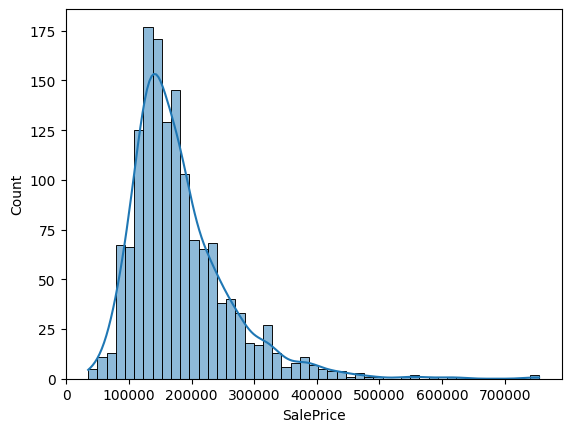

Skewness:  1.8829
Kurtosis:  6.5363


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

sns.histplot(train[target], kde=True)
plt.show()
print('Skewness: ', f'{train[target].skew():.4f}')
print('Kurtosis: ', f'{train[target].kurt():.4f}')

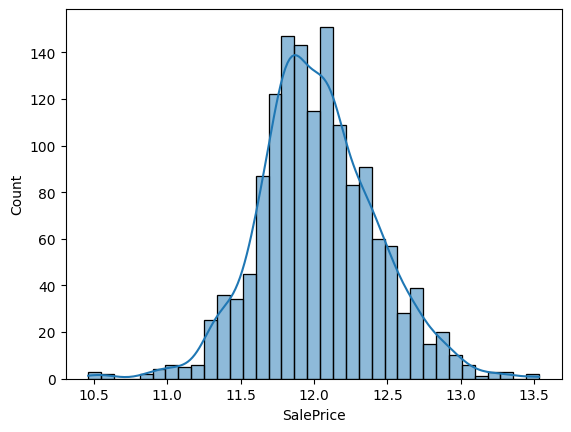

Skewness:  0.1213
Kurtosis:  0.8095


In [55]:
train_target = np.log1p(train_target)
train.drop(target, axis=1, inplace=True)
sns.histplot(train_target, kde=True)
plt.show()
print('Skewness: ', f'{train_target.skew():.4f}')
print('Kurtosis: ', f'{train_target.kurt():.4f}')

### 4.Drop the unnecessary columns from both `Train` and `Test` datasets

In [57]:
cat_handle = 1
num_handle = 1
ord_handle = 1

if cat_handle == 1:
    cat_handle = 'FillWithMedian' # Convert each category to its median of SalePrice, then min-max scale
else:
    cat_handle = 'GetDummies' # Get dummies for each category
if num_handle == 1:
    num_handle = 'log1p'
else:
    num_handle = 'BoxCox'
if ord_handle == 1:
    ord_handle = 'ConvertToNum' # Convert each ordinal category to its median of SalePrice
else:
    ord_handle = 'GetDummies'# Get dummies for each ordinal category

    train.drop(target, axis=1, inplace=True)
combined = pd.concat([train, test], axis=0)

### 5. Hanlde the misssing data

In [58]:
print(combined.isnull().sum()[combined.isnull().sum() > 0].sort_values(ascending=False))

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageQual       159
GarageCond       159
GarageYrBlt      159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
GarageArea         1
GarageCars         1
Electrical         1
KitchenQual        1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64


In [59]:
print(combined.describe().T[['mean', 'std', 'min', 'max']].sort_values(by='max', ascending=False))

                       mean          std     min       max
LotArea        10168.114080  7886.996359  1300.0  215245.0
MiscVal           50.825968   567.402211     0.0   17000.0
TotalBsmtSF     1051.777587   440.766258     0.0    6110.0
BsmtFinSF1       441.423235   455.610826     0.0    5644.0
GrLivArea       1500.759849   506.051045   334.0    5642.0
1stFlrSF        1159.581706   392.362079   334.0    5095.0
BsmtUnfSF        560.772104   439.543659     0.0    2336.0
GarageYrBlt     1978.113406    25.574285  1895.0    2207.0
2ndFlrSF         336.483727   428.701456     0.0    2065.0
YrSold          2007.792737     1.314964  2006.0    2010.0
YearRemodAdd    1984.264474    20.894344  1950.0    2010.0
YearBuilt       1971.312778    30.291442  1872.0    2010.0
MasVnrArea       102.201312   179.334253     0.0    1600.0
BsmtFinSF2        49.582248   169.205611     0.0    1526.0
GarageArea       472.874572   215.394815     0.0    1488.0
WoodDeckSF        93.709832   126.526589     0.0    1424

### 6. Encode the categorical data

In [60]:
col_cat = combined.select_dtypes(include='object').columns.to_list()
if cat_handle == 'FillWithMedian':
    train = combined[:train_id.shape[0]]
    train[target] = train_target
    # Select the categorical features with unique value over 2
    col_cat_h = combined[col_cat].nunique()[combined[col_cat].nunique() > 2].index.to_list()
    for i in col_cat_h:
        # Get the median of each category
        cat_median = train.groupby(i)[target].median().to_dict()
        # Convert the category to median
        combined[i] = combined[i].map(cat_median)
        scaler == MinMaxScaler()
        combined[i] = scaler.fit_transform(combined[i].values.reshape(-1, 1))
    col_cat_l = combined[col_cat].nunique()[combined[col_cat].nunique() <= 2].index.to_list()
    combined = pd.get_dummies(combined, columns=col_cat_l, drop_first=True)
elif cat_handle == 'GetDummies':
    combined = pd.get_dummies(combined, columns=col_cat, drop_first=True)
else:
    pass

<ipython-input-60-96b9b2b3f0a2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[target] = train_target


In [61]:
test = combined.iloc[-len(test_id):, :]
train = combined.iloc[:-len(test_id), :]
train[target] = train_target

<ipython-input-61-59d94a9b01b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[target] = train_target


In [62]:
print(train.isnull().sum()[train.isnull().sum() > 0].sort_values(ascending=False))
print(test.isnull().sum()[test.isnull().sum() > 0].sort_values(ascending=False))

PoolQC          1453
MiscFeature     1406
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtFinType1      37
BsmtQual          37
MasVnrType         8
MasVnrArea         8
Electrical         1
dtype: int64
PoolQC          1456
MiscFeature     1408
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
Functional         2
BsmtHalfBath       2
KitchenQual        1
TotalBsmtSF        1
GarageCars         1
GarageArea         1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1


In [63]:
# Fill MSSubClass with the mode of the same neighborhood
test['MSSubClass'] = test.groupby('Neighborhood')['MSSubClass'].transform(lambda x: x.fillna(x.mode()[0]))

<ipython-input-63-66556951e25f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['MSSubClass'] = test.groupby('Neighborhood')['MSSubClass'].transform(lambda x: x.fillna(x.mode()[0]))


### 7.Split the Train & Test datasets

In [28]:
from sklearn.model_selection import train_test_split

# Assuming you have already encoded your dataset and have a DataFrame called df_encoded

# Separate the target variable (SalePrice) from the features
X = df_encoded.drop(columns=['SalePrice'])
y = df_encoded['SalePrice']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you have the following datasets:
# X_train: Features for training
# X_test: Features for testing
# y_train: Target variable for training
# y_test: Target variable for testing


### 8. Do Feature Scaling if required

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Example using Standardization (Z-score scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Example using Min-Max Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### 9. Apply dimensionality reduction if required

In [30]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.impute import SimpleImputer

# Create an imputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your training data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Now, you can apply PCA to the imputed data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_imputed)
X_test_pca = pca.transform(X_test_imputed)




### 10. Train the required model

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.drop(target, axis=1), train[target], test_size=0.25, random_state=random_seed)

In [65]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=10, shuffle=True, random_state=random_seed)

def rmsle_cv(model):
    # model.fit(train.drop(target, axis=1), train[target])
    rmse = np.sqrt(-cross_val_score(model, train.drop(target, axis=1), train[target], cv=kf, scoring='neg_mean_squared_error').mean())
    return rmse

In [66]:
# Import the models
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor
from sklearn.linear_model import LassoLarsCV, ElasticNetCV, Ridge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import LinearSVR, SVR

In [67]:
gb = GradientBoostingRegressor(n_estimators=1000,
                                learning_rate=0.03,
                                max_depth=4,
                                max_features=8,
                                min_samples_leaf=1,
                                min_samples_split=16,
                                random_state=1,
                                verbose=False)

In [69]:
et = ExtraTreesRegressor(n_estimators=320,
                            max_depth=16,
                            min_samples_leaf=1,
                            min_samples_split=2,
                            max_features=64,
                            max_leaf_nodes=None,
                            random_state=3,
                            n_jobs=-1,
                            verbose=False)

In [70]:
lasso = LassoLarsCV(max_iter=64,
                    cv=kf,
                    max_n_alphas=16,
                    n_jobs=-1)

In [71]:
xgb = XGBRegressor(n_estimators=1280,
                    learning_rate=0.03,
                    max_depth=4,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.6,
                    colsample_bytree=0.2,
                    reg_alpha=0.01,
                    reg_lambda=0.01,
                    random_state=3,
                    n_jobs=-1,
                    verbosity=0)

In [72]:
lgb = LGBMRegressor(n_estimators=640,
                    learning_rate=0.03,
                    max_depth=4,
                    min_child_weight=8,
                    colsample_bytree=0.3,
                    reg_alpha=0.1,
                    reg_lambda=0.01,
                    random_state=5,
                    n_jobs=-1,
                    verbosity=-1)

In [73]:
en = ElasticNetCV(max_iter=160,
                    eps=0.0003,
                    cv=kf,
                    l1_ratio=1,
                    n_alphas=40,
                    n_jobs=-1)

In [74]:
lsvr = LinearSVR(max_iter=320,
                tol=0.01,
                epsilon=0.001,
                C=16,
                random_state=1,
                verbose=False)

In [75]:
svr = SVR(kernel='rbf',
            gamma=0.003,
            C=16,
            epsilon=0.01,
            max_iter=1280,
            tol=0.001,
            verbose=False)

In [76]:
ridge = Ridge(alpha=1,
                max_iter=40,
                random_state=1)

In [77]:
hgb = HistGradientBoostingRegressor(max_iter=640,
                                    learning_rate=0.03,
                                    max_depth=4,
                                    min_samples_leaf=1,
                                    max_leaf_nodes=16,
                                    max_bins=128,
                                    random_state=1,
                                    verbose=False)

In [78]:
from sklearn.ensemble import StackingRegressor, VotingRegressor, BaggingRegressor

### 11. Check the Model Performance()

In [38]:


data = pd.read_csv('train.csv')


X = data.drop(columns=['Id', 'SalePrice'])
y = data['SalePrice']



data = pd.read_csv('train.csv')


categorical_columns = data.select_dtypes(include=['object']).columns


data_encoded = pd.get_dummies(data, columns=categorical_columns)


X = data_encoded.drop(columns=['Id', 'SalePrice'])
y = data_encoded['SalePrice']


In [33]:

df_encoded = pd.get_dummies(df, columns=['MSZoning', 'Street', 'SaleType',	'SaleCondition',	'SalePrice'])
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()


df['ExterQual'] = label_encoder.fit_transform(df['ExterQual'])



### 12. Fine tune the model if required.

### 13. Create a submission file and upload into Kaggle

# For uploading you need to execute the follwing script

In [87]:
from google.colab import auth
auth.authenticate_user()
import requests
gcloud_token = !gcloud auth print-access-token
gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
user = gcloud_tokeninfo['email']
import datetime
dt = datetime.datetime.now()
x = str(dt).split('.')[0]
print(f"This Script is executed by: ",user, "at", x)

This Script is executed by:  priyeshsinha080@gmail.com at 2023-09-07 18:58:40
